In [1]:
import cv2
import numpy as np
import glob
import time
from IPython import display

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

In [2]:
# get a list of all images
images = np.sort(glob.glob('/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/*.JPG'))  # np.sort gets the filenames in numerical order 
print(images)


['/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9954.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9955.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9956.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9957.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9958.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9959.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9960.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9961.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9962.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9963.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9964.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9965.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9966.JPG'
 '/Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9967.JPG'
 '/Users/huanjinghen

### create an array representing the 3D coordinates of the corners on the checkerboard
the z coordiante of all points is zero because z is perpendiculas to the plane and we set the the origin into the image plane

In [3]:
# Defining the dimensions of checkerboard
CHECKERBOARD = (6,9)

# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# recalibrate checkerboards from 'field' units to meter
objp*=0.00573   # size of one square in m

print(objp)  

[[[0.      0.      0.     ]
  [0.00573 0.      0.     ]
  [0.01146 0.      0.     ]
  [0.01719 0.      0.     ]
  [0.02292 0.      0.     ]
  [0.02865 0.      0.     ]
  [0.      0.00573 0.     ]
  [0.00573 0.00573 0.     ]
  [0.01146 0.00573 0.     ]
  [0.01719 0.00573 0.     ]
  [0.02292 0.00573 0.     ]
  [0.02865 0.00573 0.     ]
  [0.      0.01146 0.     ]
  [0.00573 0.01146 0.     ]
  [0.01146 0.01146 0.     ]
  [0.01719 0.01146 0.     ]
  [0.02292 0.01146 0.     ]
  [0.02865 0.01146 0.     ]
  [0.      0.01719 0.     ]
  [0.00573 0.01719 0.     ]
  [0.01146 0.01719 0.     ]
  [0.01719 0.01719 0.     ]
  [0.02292 0.01719 0.     ]
  [0.02865 0.01719 0.     ]
  [0.      0.02292 0.     ]
  [0.00573 0.02292 0.     ]
  [0.01146 0.02292 0.     ]
  [0.01719 0.02292 0.     ]
  [0.02292 0.02292 0.     ]
  [0.02865 0.02292 0.     ]
  [0.      0.02865 0.     ]
  [0.00573 0.02865 0.     ]
  [0.01146 0.02865 0.     ]
  [0.01719 0.02865 0.     ]
  [0.02292 0.02865 0.     ]
  [0.02865 0.02865 0

### find the corners in the first image

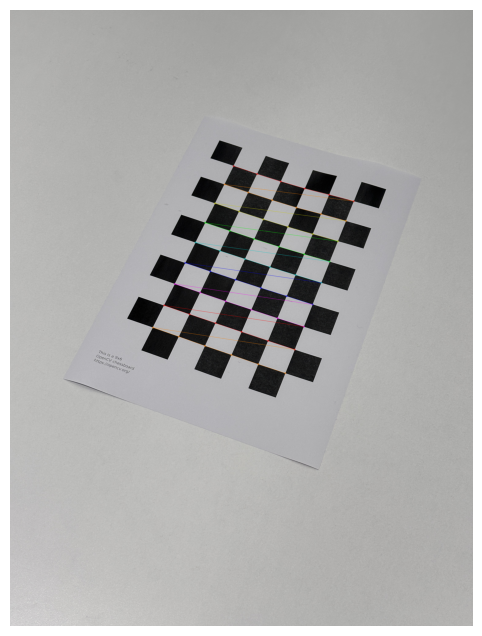

In [4]:
img = cv2.imread(images[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Find the checkerboard corners
# If desired number of corners are found in the image then ret = true
ret, corners = cv2.findChessboardCorners(gray, 
         CHECKERBOARD,                         # number of corners to look for
         cv2.CALIB_CB_ADAPTIVE_THRESH          # do not use global threshold for binarization
        +cv2.CALIB_CB_FAST_CHECK               # saves time if no checkerboard can be found
        #+cv2.CALIB_CB_NORMALIZE_IMAGE         # performs histogram equalization
        #+cv2.CALIB_CB_FILTER_QUADS            # helps to reduce number of wrongfully detected square
        )
    
if ret == True:          # checkerboard has been found
        
        # Draw and display the corners   
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners,ret)
       
        plt.figure(figsize=(12,8))
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
else:
    print('try another image')


### loop over all images and detect the corners

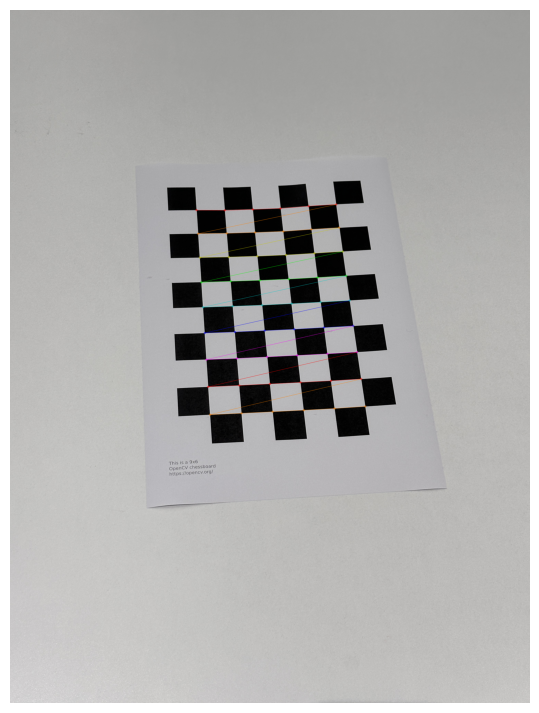

corners could be detected in 22 out of 22 images


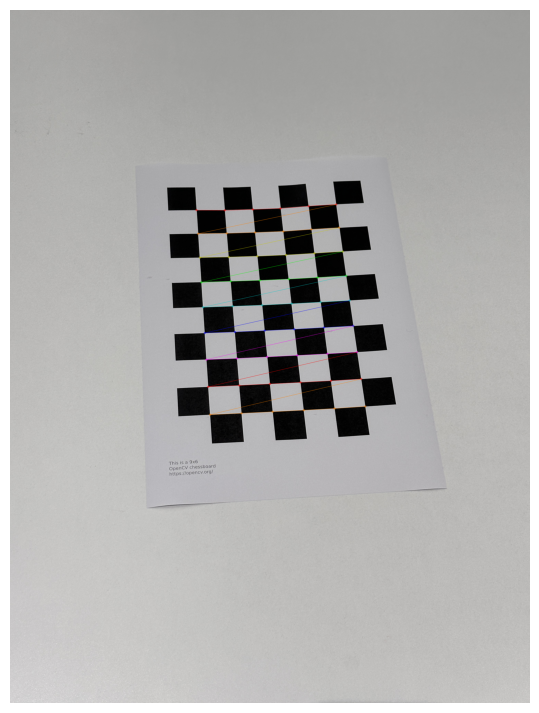

In [5]:
# built a list of all images where a checkerboard get's detected
working= []     

# built a list to store the 2D vectors of the corners for all checkerboard images
imgpoints = [] 

# built a list to store the 3D vectors of the corners for all checkerboards 
worldpoints = []


plt.figure(figsize =(14,9))
number_found =0

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the checkerboard corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, 
         CHECKERBOARD,                         # number of corners to look for
         cv2.CALIB_CB_ADAPTIVE_THRESH          # do not use global threshold for binarization
        +cv2.CALIB_CB_FAST_CHECK               # saves time if no checkerboard can be found
        #+cv2.CALIB_CB_NORMALIZE_IMAGE         # performs histogram equalization
        #+cv2.CALIB_CB_FILTER_QUADS            # helps to reduce number of wrongfully detected square
        )
    
    if ret == True:          # checkerboard has been found
        worldpoints.append(objp)    # we always append the same array
        imgpoints.append(corners)   # the corresponding 2D points in the image
        working.append(fname)
        
        # Draw and display the corners      
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners,ret)
         
    else:
        print('no corners detected in', fname)
        time.sleep(1.0)
           
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

    
print('corners could be detected in {} out of {} images'.format(len(working), len(images)) )    

In [6]:
# show result 
print('image number 0 has {} corners, each described by {} coordinates'.
      format(imgpoints[0].shape[0], imgpoints[0].shape[2]))

image number 0 has 54 corners, each described by 2 coordinates


In [7]:
# Performing camera calibration by passing the list of known 3D points (worldpoints) 
# and corresponding pixel coordinates of the detected corners (imgpoints)

camera_matrix = np.zeros((3, 3),'float32')    
dist_coefs = np.zeros(5,'float32')

ret, camera_matrix, dist_coefs, rvecs, tvecs  = cv2.calibrateCamera(
                                                    worldpoints, imgpoints, 
                                                    gray.shape[::-1],
                                                    camera_matrix, dist_coefs,
                                                    flags = cv2.CALIB_ZERO_TANGENT_DIST  # to be assumed for precision cameras 
                                                    # there are more options: https://docs.opencv.org/master/d9/d0c/group__calib3d.html
                                                    )


np.set_printoptions(precision=3, suppress=True)

print("Camera matrix:")
print(camera_matrix)

print('\n the expected values for the focal points: f_x = {} and  f_y = {} pixels'.format(img.shape[1]/2,img.shape[0]/2))


print("\n dist_coefs:")
print(dist_coefs)

print("\n tvec of image 1 :")
print(tvecs[0])

print("\n rvec of image 1 :")
print(rvecs[0])

Camera matrix:
[[5572.681    0.    1507.946]
 [   0.    5938.263 2431.673]
 [   0.       0.       1.   ]]

 the expected values for the focal points: f_x = 1512.0 and  f_y = 2016.0 pixels

 dist_coefs:
[[ 0.367]
 [-0.453]
 [ 0.   ]
 [ 0.   ]
 [-1.548]]

 tvec of image 1 :
[[-0.002]
 [-0.046]
 [ 0.198]]

 rvec of image 1 :
[[-0.57 ]
 [ 0.093]
 [ 0.356]]


#### the expected camera constants $c_x$ and $c_y$ correspond to focal length, measured in mm,  times pixels per mm

In [8]:
# save result for use with second notebook
np.savez('calibration.npz', camera_matrix,dist_coefs,tvecs,rvecs,working)

### correct nonlinear distortions

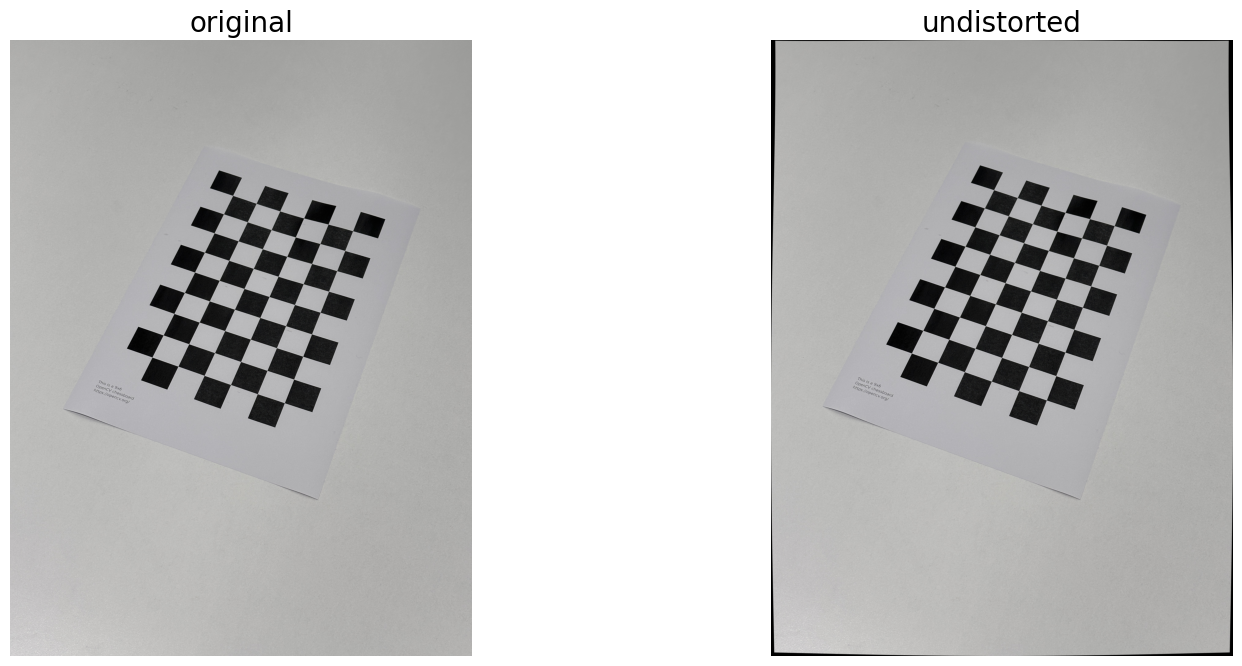

In [9]:
# Using the derived camera parameters to undistort the image
img = cv2.imread(images[0])
h,w = img.shape[:2]

# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(camera_matrix,dist_coefs,(w,h),1,(w,h))

# undistort the image
dst = cv2.undistort(img, camera_matrix, dist_coefs, None, newcameramtx)

# Displaying the undistorted image
plt.figure(figsize =(18,8))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('original', fontsize =20 )

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('undistorted', fontsize =20 )
plt.show()